In [1]:
from IPython.display import HTML
import requests

HTML(requests.get("https://vincentarelbundock.github.io/Rdatasets/doc/ggplot2/diamonds.html").content.decode("utf-8"))

diamonds,R Documentation


In [5]:
import pandas as pd
import seaborn as sns; sns.set_style("white")
import matplotlib.pyplot as plt; plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
from pandas.plotting import register_matplotlib_converters; register_matplotlib_converters()

df = pd.read_csv("https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/ggplot2/diamonds.csv")
df.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


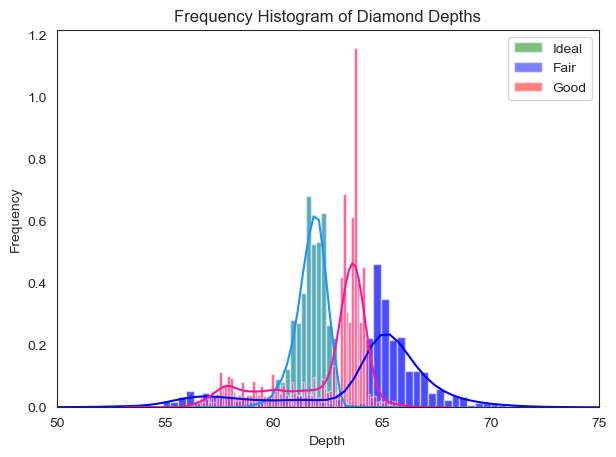

In [6]:
x1 = df.loc[df.cut=='Ideal', 'depth']
x2 = df.loc[df.cut=='Fair', 'depth']
x3 = df.loc[df.cut=='Good', 'depth']

kwargs = dict(alpha=0.5, bins=100, density=True)
kwargs2 = dict(bins=100)

plt.hist(x1, **kwargs, color='g', label='Ideal')
plt.hist(x2, **kwargs, color='b', label='Fair')
plt.hist(x3, **kwargs, color='r', label='Good')
sns.distplot(x1, color="dodgerblue", **kwargs2)
sns.distplot(x2, color="b", **kwargs2)
sns.distplot(x3, color="deeppink", **kwargs2)
plt.gca().set(title='Frequency Histogram of Diamond Depths', ylabel='Frequency', xlabel="Depth")
plt.xlim(50,75)
plt.legend();

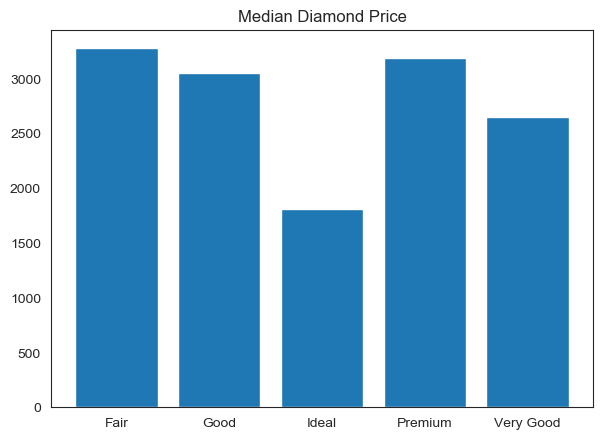

In [7]:
data = df[['cut', 'price']].groupby('cut').median().round(2)

plt.bar(data.index, height=data.price)
plt.title('Median Diamond Price');